Data Mining Assignment 1 

Soheil Vasigh Mehr - 402125060

In [30]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [31]:
#Importing Dataset
df = pd.read_csv("/Users/soheil/Downloads/Kidney/chronic_kidney_disease_full.csv", on_bad_lines="skip")
df.columns = df.columns.str.replace("'", "", regex=False)   #Deleting the '' form the columns' names for better handling
print(df.columns)

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class', 'Unnamed: 25'],
      dtype='object')


In [32]:
#showing df (column 26 is extra here and should be deleted)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,Unnamed: 25
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,7800,5.2,yes,yes,no,good,no,no,ckd,NaN
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,6000,?,no,no,no,good,no,no,ckd,NaN
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,7500,?,no,yes,no,poor,no,yes,ckd,NaN
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,NaN
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,7300,4.6,no,no,no,good,no,no,ckd,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.02,0,0,normal,normal,notpresent,notpresent,140,...,6700,4.9,no,no,no,good,no,no,notckd,NaN
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,7800,6.2,no,no,no,good,no,no,notckd,NaN
397,12,80,1.02,0,0,normal,normal,notpresent,notpresent,100,...,6600,5.4,no,no,no,good,no,no,notckd,NaN
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,7200,5.9,no,no,no,good,no,no,notckd,NaN


In [33]:
#Dividing columns into 2 category; Numerical and Textual. Our procedure in cleaning each of these categories will be specified
num_col = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
text_col = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

In [34]:
#Replacing "?"s in the columns with NaN and calculating NaN number in each  column (Numericals)
df.replace("?", np.nan, inplace = True)
missing_count = df[num_col].isna().sum()
print(missing_count)

age       9
bp       12
sg       47
al       46
su       49
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      70
wbcc    105
rbcc    130
dtype: int64


In [35]:
#Replacing "?"s in the columns with NaN and calculating NaN number in each  column (Numericals)
missing_count_txt = df[text_col].isna().sum()
print(missing_count_txt)

rbc      152
pc        65
pcc        4
ba         4
htn        2
dm         3
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64


In [36]:
#Filling NaN values in Numerical columns with the average of non-NaN cells in each column

for col in num_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    mean_of_col = df[col].mean()
    df[col].fillna(mean_of_col, inplace=True)
print(df[num_col].head(20))

     age          bp        sg        al        su         bgr     bu    sc  \
0   48.0   80.000000  1.020000  1.000000  0.000000  121.000000   36.0   1.2   
1    7.0   50.000000  1.020000  4.000000  0.000000  148.036517   18.0   0.8   
2   62.0   80.000000  1.010000  2.000000  3.000000  423.000000   53.0   1.8   
3   48.0   70.000000  1.005000  4.000000  0.000000  117.000000   56.0   3.8   
4   51.0   80.000000  1.010000  2.000000  0.000000  106.000000   26.0   1.4   
5   60.0   90.000000  1.015000  3.000000  0.000000   74.000000   25.0   1.1   
6   68.0   70.000000  1.010000  0.000000  0.000000  100.000000   54.0  24.0   
7   24.0   76.469072  1.015000  2.000000  4.000000  410.000000   31.0   1.1   
8   52.0  100.000000  1.015000  3.000000  0.000000  138.000000   60.0   1.9   
9   53.0   90.000000  1.020000  2.000000  0.000000   70.000000  107.0   7.2   
10  50.0   60.000000  1.010000  2.000000  4.000000  490.000000   55.0   4.0   
11  63.0   70.000000  1.010000  3.000000  0.000000  

/var/folders/d6/jg4kg4r559q5r2lgb1by5l7h0000gn/T/ipykernel_6815/2561796789.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_of_col, inplace=True)


In [37]:
#Cleaning the Data

#The last column in the dataset was droped (It was created because one extra data in row 371)
df.drop(df.columns[25], axis=1, inplace=True)

#Deleting additional spaces in the values in the Textual columns (These spaces should have been corrected for encoding textual columns)
df[text_col] = df[text_col].apply(lambda x: x.str.strip())

#in one of the rows, the values for two columns were replaced with eachother and this row also had a missing value in one of the other cells, so it was deleted
indices_to_drop = df[df["pe"] == "good"].index
df.drop(index=indices_to_drop, inplace=True)

In [38]:
#Filling the NaN values in textual columns and encoding the textual values

#Fill NaN values with the majority label in each column
for col in text_col:
    majority_label = df[col].mode()[0]  
    df[col].fillna(majority_label, inplace=True) 

#Initialize LabelEncoder and encode the text columns + generating a report for tracking each of text values has turned to what number (encode map)
encoding_report = {}
label_encoder = LabelEncoder()

for col in text_col:
    df[col] = label_encoder.fit_transform(df[col].astype(str))
    encoding_report[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

#Print the encoded DataFrame
print(df[text_col].head())

#Generating the report
for col, mapping in encoding_report.items():
    print(f"\nColumn: '{col}' Encoding Mapping")
    report_df = pd.DataFrame(list(mapping.items()), columns=['Text Value', 'Encoded Value'])
    print(report_df)

    # Check if 'NaN' or any placeholder exists in the mapping
    if 'nan' in mapping:
        nan_encoding = mapping['nan']
        print(f"In column '{col}', NaN values were filled with the majority label and are now represented by: {nan_encoding}")


   rbc  pc  pcc  ba  htn  dm  cad  appet  pe  ane  class
0    1   1    0   0    1   1    0      0   0    0      0
1    1   1    0   0    0   0    0      0   0    0      0
2    1   1    0   0    0   1    0      1   0    1      0
3    1   0    1   0    1   0    0      1   1    1      0
4    1   1    0   0    0   0    0      0   0    0      0

Column: 'rbc' Encoding Mapping
  Text Value  Encoded Value
0   abnormal              0
1     normal              1

Column: 'pc' Encoding Mapping
  Text Value  Encoded Value
0   abnormal              0
1     normal              1

Column: 'pcc' Encoding Mapping
   Text Value  Encoded Value
0  notpresent              0
1     present              1

Column: 'ba' Encoding Mapping
   Text Value  Encoded Value
0  notpresent              0
1     present              1

Column: 'htn' Encoding Mapping
  Text Value  Encoded Value
0         no              0
1        yes              1

Column: 'dm' Encoding Mapping
  Text Value  Encoded Value
0         no   

/var/folders/d6/jg4kg4r559q5r2lgb1by5l7h0000gn/T/ipykernel_6815/337795146.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(majority_label, inplace=True)


In [39]:
#Printing DataFrame after handling both categorical and numerical columns
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,47.0,6700.0,4.900000,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,54.0,7800.0,6.200000,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,49.0,6600.0,5.400000,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,51.0,7200.0,5.900000,0,0,0,0,0,0,1


In [40]:
# scale features with min max scaling
scaler = MinMaxScaler()
model=scaler.fit(df)
scaled_data=model.transform(df)
print(scaled_data)

[[0.52272727 0.23076923 0.75       ... 0.         0.         0.        ]
 [0.05681818 0.         0.75       ... 0.         0.         0.        ]
 [0.68181818 0.23076923 0.25       ... 0.         1.         0.        ]
 ...
 [0.11363636 0.23076923 0.75       ... 0.         0.         1.        ]
 [0.17045455 0.07692308 1.         ... 0.         0.         1.        ]
 [0.63636364 0.23076923 1.         ... 0.         0.         1.        ]]


In [41]:
#Separating data into x and y for applying classifier (Minimum Euclidean Distance [MED])
X = df.drop(columns=['class']) 
y = df['class'] 

In [42]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Defining MED Classifier (Minimum Euclidean Distance)
class MEDClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        # Compute the centroids of each class
        self.classes_ = np.unique(y)
        self.centroids_ = np.array([X[y == label].mean(axis=0) for label in self.classes_])
        self.y_train = y
        return self
    
    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            # Compute the Euclidean distance from the test point to each class centroid
            distances = np.linalg.norm(self.centroids_ - test_point, axis=1)
            closest_class = self.classes_[np.argmin(distances)]
            predictions.append(closest_class)
        return np.array(predictions)

In [44]:
# 1. Filter Method with MED (Baseline)
# Feature selection using SelectKBest
filter_selector = SelectKBest(score_func=chi2, k=5)
X_train_filtered = filter_selector.fit_transform(X_train, y_train)
X_test_filtered = filter_selector.transform(X_test)

# Get selected feature names
selected_features_filter = X_train.columns[filter_selector.get_support()].tolist()
print(f"Selected Features (Filter Method): {selected_features_filter}")

# Train MED classifier on filtered features
med_classifier = MEDClassifier()
med_classifier.fit(X_train_filtered, y_train)
y_pred_filter = med_classifier.predict(X_test_filtered)
filter_accuracy = accuracy_score(y_test, y_pred_filter)

Selected Features (Filter Method): ['bgr', 'bu', 'sc', 'pcv', 'wbcc']


In [45]:
# 2. Forward Feature Selection with MED
forward_selector = SequentialFeatureSelector(med_classifier, n_features_to_select='auto', direction='forward')
X_forward_train = forward_selector.fit_transform(X_train, y_train)
X_forward_test = forward_selector.transform(X_test)

# Get selected feature names
selected_features_forward = X_train.columns[forward_selector.get_support()].tolist()
print(f"Selected Features (Forward Selection): {selected_features_forward}")

# Train MED classifier after forward selection
med_classifier.fit(X_forward_train, y_train)
y_pred_forward = med_classifier.predict(X_forward_test)
accuracy_forward = accuracy_score(y_test, y_pred_forward)

Selected Features (Forward Selection): ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'hemo', 'rbcc', 'htn', 'cad', 'appet']


In [46]:
# 3. Backward Feature Selection with MED
backward_selector = SequentialFeatureSelector(med_classifier, n_features_to_select='auto', direction='backward')
X_backward_train = backward_selector.fit_transform(X_train, y_train)
X_backward_test = backward_selector.transform(X_test)

# Get selected feature names
selected_features_backward = X_train.columns[backward_selector.get_support()].tolist()
print(f"Selected Features (Backward Selection): {selected_features_backward}")

# Train MED classifier after backward selection
med_classifier.fit(X_backward_train, y_train)
y_pred_backward = med_classifier.predict(X_backward_test)
accuracy_backward = accuracy_score(y_test, y_pred_backward)

Selected Features (Backward Selection): ['bgr', 'bu', 'pot', 'hemo', 'pcv', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [47]:
# 4. Hybrid Feature Selection with MED (Forward + Backward)
# Sensitivity Analysis: Test different values for L and R in the hybrid approach
best_accuracy_hybrid = 0
best_L = None
best_R = None
selected_features_hybrid = []

for L in range(1, X_train.shape[1] // 2):
    for R in range(1, L):
        hybrid_selector = SequentialFeatureSelector(med_classifier, n_features_to_select=L, direction='forward')
        X_hybrid_train = hybrid_selector.fit_transform(X_train, y_train)
        
        if X_hybrid_train.shape[1] > R:
            hybrid_selector_back = SequentialFeatureSelector(med_classifier, n_features_to_select=R, direction='backward')
            X_hybrid_train_final = hybrid_selector_back.fit_transform(X_hybrid_train, y_train)
        else:
            X_hybrid_train_final = X_hybrid_train

        med_classifier.fit(X_hybrid_train_final, y_train)
        X_hybrid_test = hybrid_selector.transform(X_test)
        if X_hybrid_train.shape[1] > R:
            X_hybrid_test = hybrid_selector_back.transform(X_hybrid_test)

        y_pred_hybrid = med_classifier.predict(X_hybrid_test)
        accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)

        if accuracy_hybrid > best_accuracy_hybrid:
            best_accuracy_hybrid = accuracy_hybrid
            best_L = L
            best_R = R
            selected_features_hybrid = X_train.columns[hybrid_selector.get_support()].tolist()

print(f"Selected Features (Hybrid Selection, Best L={best_L}, R={best_R}): {selected_features_hybrid}")

Selected Features (Hybrid Selection, Best L=2, R=1): ['su', 'hemo']


Percentage of Variance Explained by Each Component:
Principal Component 1: 99.85%
Principal Component 2: 0.10%
Principal Component 3: 0.04%
Principal Component 4: 0.01%
Principal Component 5: 0.00%
Principal Component 6: 0.00%
Principal Component 7: 0.00%
Principal Component 8: 0.00%
Principal Component 9: 0.00%
Principal Component 10: 0.00%
Principal Component 11: 0.00%
Principal Component 12: 0.00%
Principal Component 13: 0.00%
Principal Component 14: 0.00%
Principal Component 15: 0.00%
Principal Component 16: 0.00%
Principal Component 17: 0.00%
Principal Component 18: 0.00%
Principal Component 19: 0.00%
Principal Component 20: 0.00%
Principal Component 21: 0.00%
Principal Component 22: 0.00%
Principal Component 23: 0.00%
Principal Component 24: 0.00%


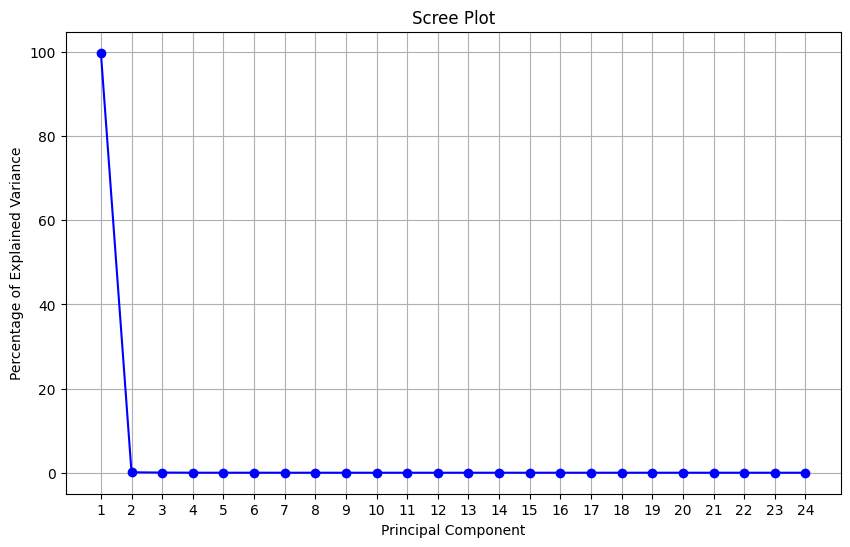

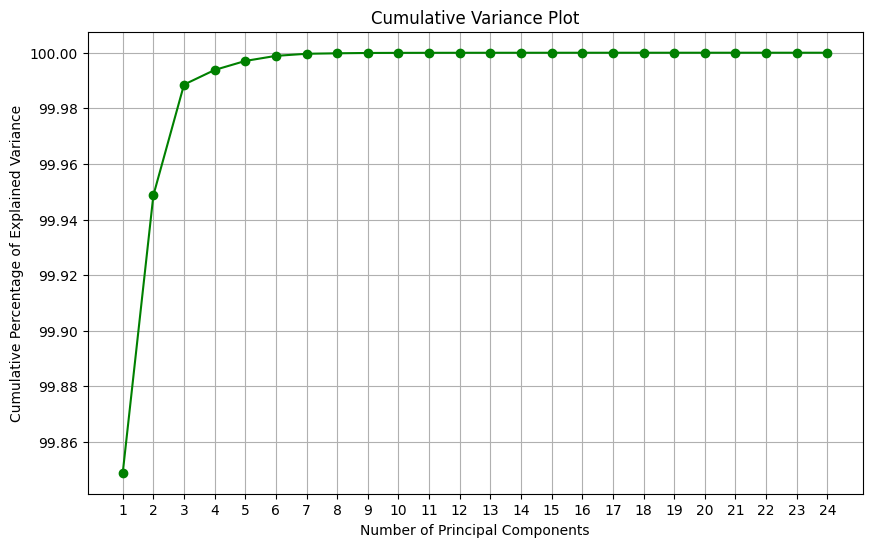

In [48]:
# 5. Applying PCA to the training data
pca = PCA()  
X_train_pca = pca.fit_transform(X_train)  

# Percentage of variance explained by each component
explained_variance = pca.explained_variance_ratio_ * 100  
print("Percentage of Variance Explained by Each Component:")
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i + 1}: {var:.2f}%")

# Plotting the Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, 'o-', color='blue', label='Explained Variance')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Explained Variance')
plt.xticks(np.arange(1, len(explained_variance) + 1))  
plt.grid(True)
plt.show()

# Cumulative explained variance to help determine optimal number of components
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, 'o-', color='green', label='Cumulative Variance')
plt.title('Cumulative Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Percentage of Explained Variance')
plt.xticks(np.arange(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.show()


In [52]:
#Conclusion

# Table 1: Accuracy Comparison
comparison_df = pd.DataFrame({
    'Method': ['Filter', 'Forward Selection', 'Backward Selection', 'Hybrid Selection', 'PCA'],
    'Accuracy': [filter_accuracy, accuracy_forward, accuracy_backward, best_accuracy_hybrid, accuracy_pca]
})

print("Accuracy Comparison Table")
print(comparison_df)

# Table 2: Selected Features
selected_features_df = pd.DataFrame({
    'Method': ['Filter', 'Forward Selection', 'Backward Selection', 'Hybrid Selection', 'PCA'],
    'Selected Features': [
        selected_features_filter,
        selected_features_forward,
        selected_features_backward,
        selected_features_hybrid,
        n_components_optimal  # PCA shows number of components
    ]
})



pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None)  

print("\nSelected Features Comparison Table")
print(selected_features_df)

pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')



Accuracy Comparison Table
               Method  Accuracy
0              Filter    0.6500
1   Forward Selection    0.9625
2  Backward Selection    0.7750
3    Hybrid Selection    0.9625
4                 PCA    0.6500

Selected Features Comparison Table
               Method  \
0              Filter   
1   Forward Selection   
2  Backward Selection   
3    Hybrid Selection   
4                 PCA   

                                               Selected Features  
0                                       [bgr, bu, sc, pcv, wbcc]  
1    [sg, al, su, rbc, pc, pcc, ba, hemo, rbcc, htn, cad, appet]  
2  [bgr, bu, pot, hemo, pcv, rbcc, htn, dm, cad, appet, pe, ane]  
3                                                     [su, hemo]  
4                                                              1  
